[[-0.022636    0.24959834]]
[ 0.3290614]


<IPython.core.display.Javascript object>


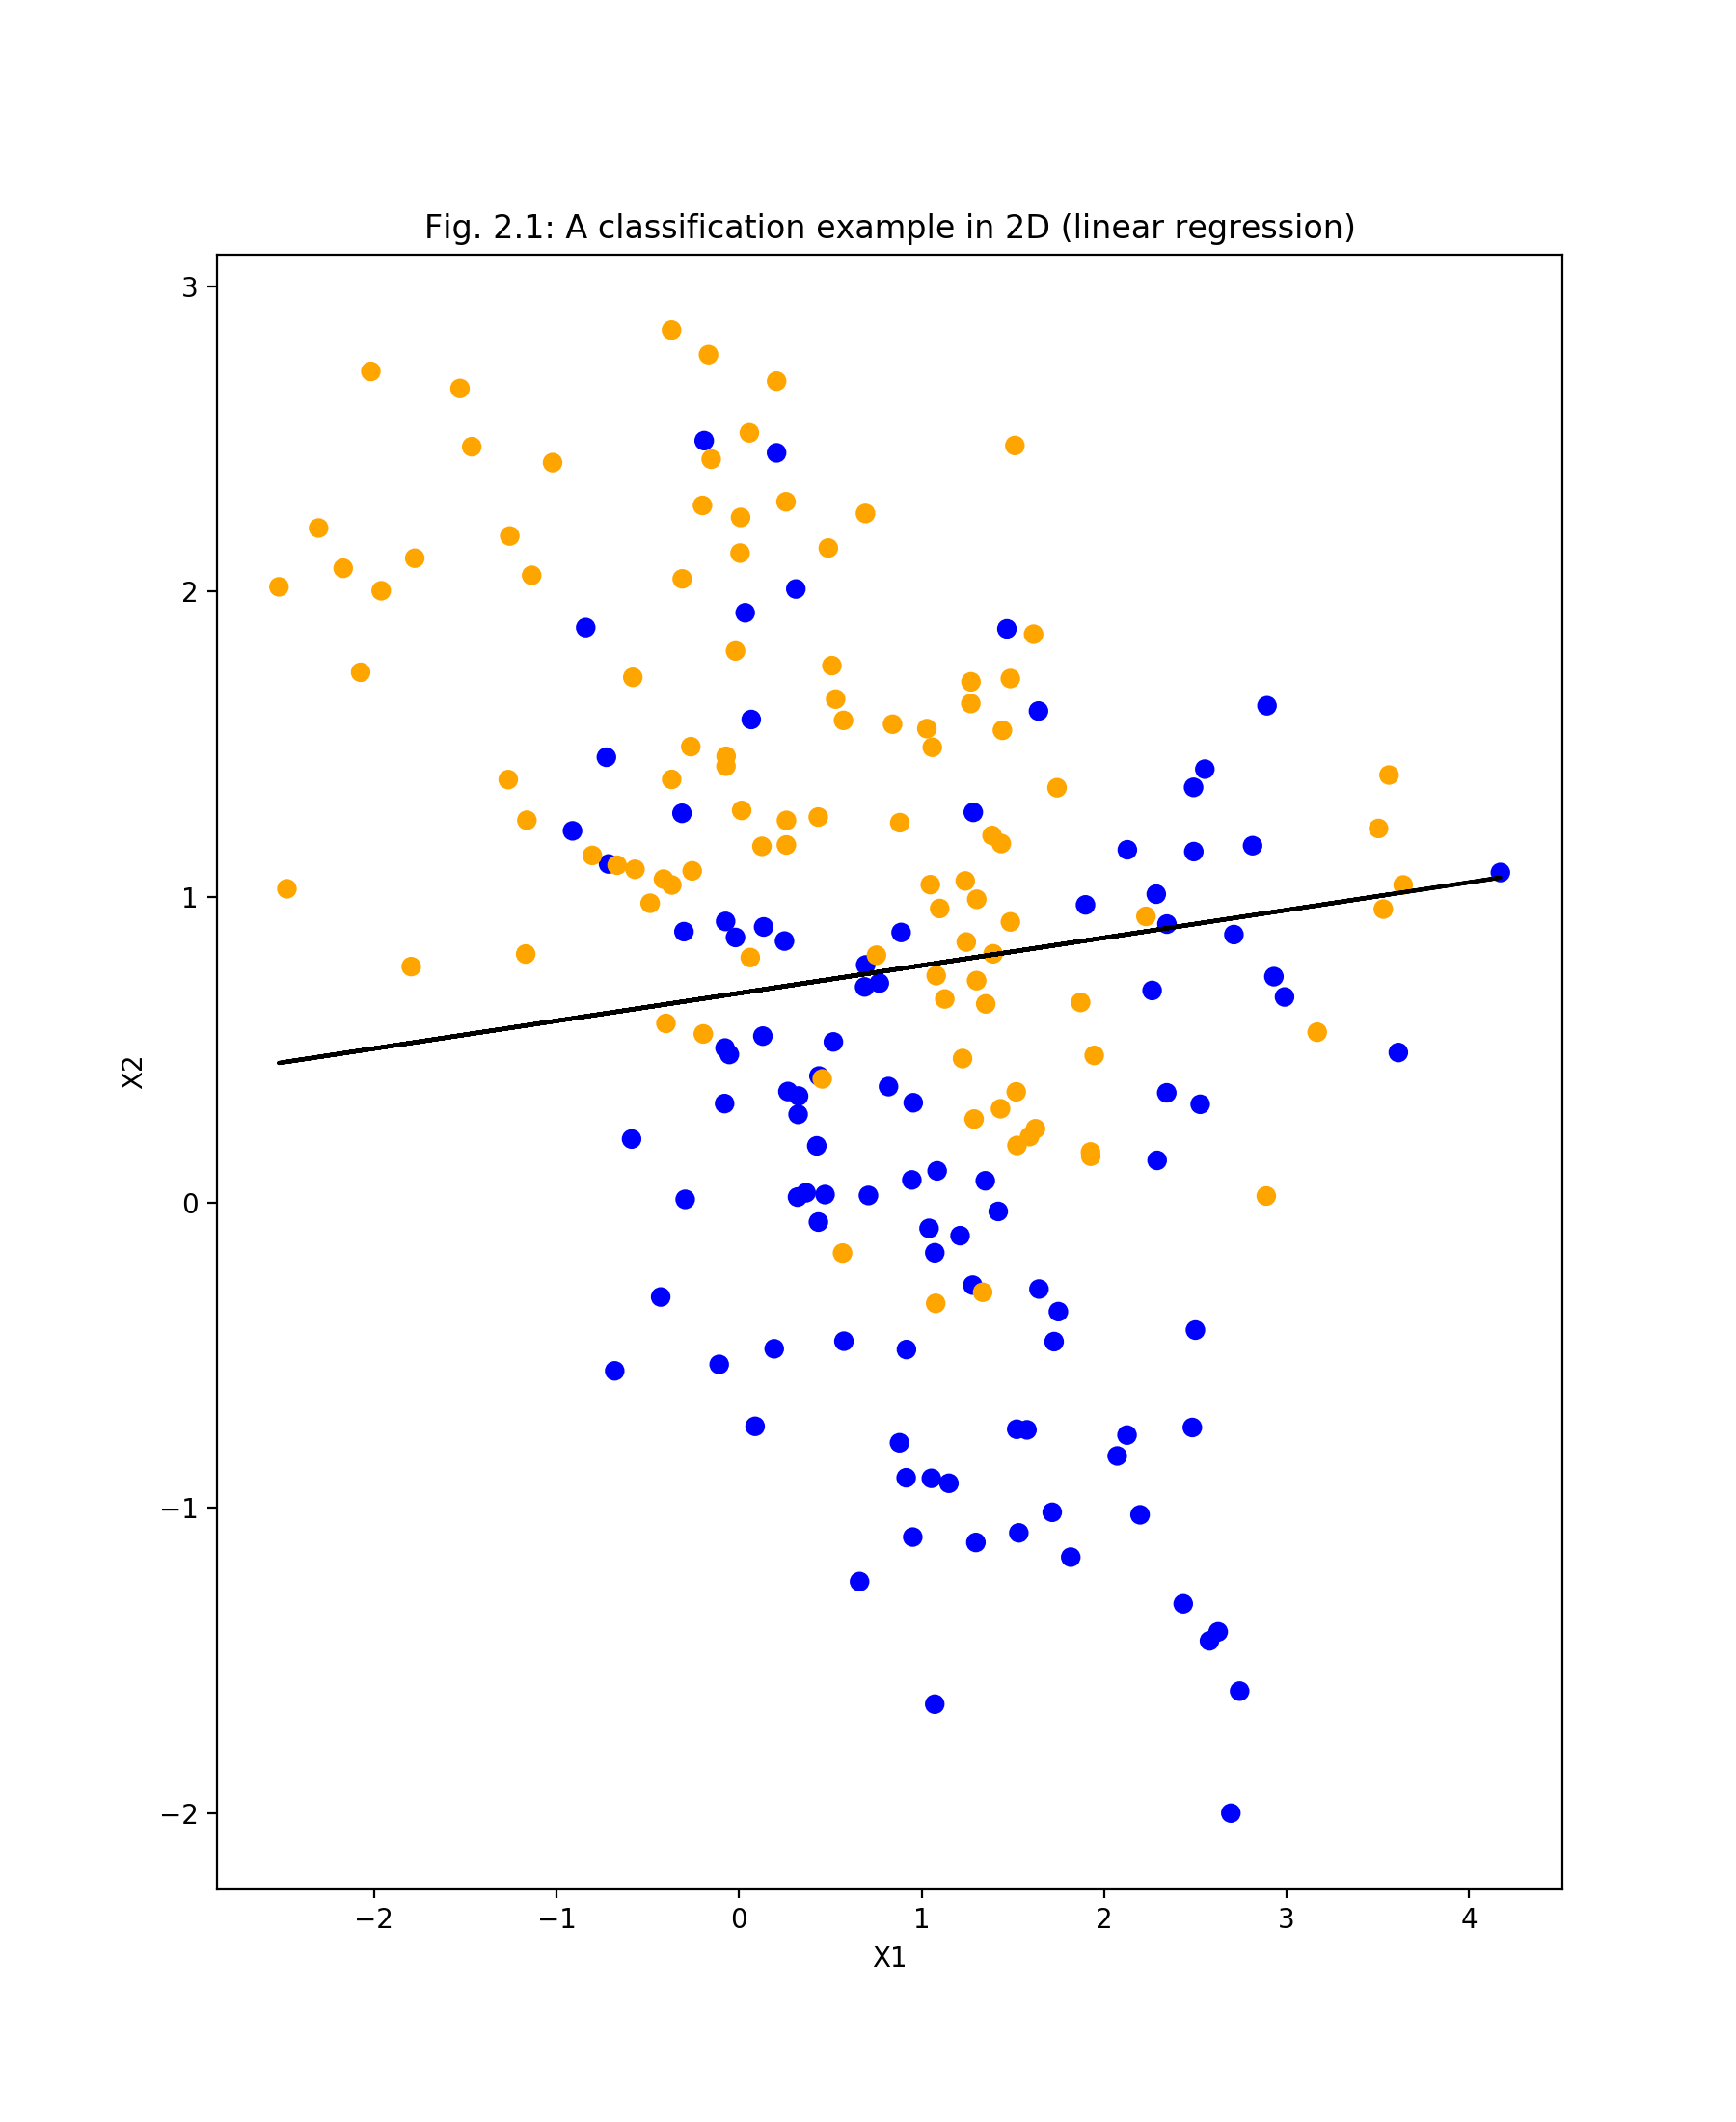

In [6]:
import rpy2.robjects as robjects
import pandas.rpy.common as com
import pandas as pd
from rpy2.robjects import pandas2ri
%matplotlib notebook
import matplotlib.pyplot as plt  # for scatter plot
from ggplot import *
from sklearn.linear_model import LinearRegression
pandas2ri.activate()

## load .RData and converts to pd.DataFrame
robj    = robjects.r.load("/Users/lasiadhi/Dropbox-2/Dropbox/Statistical_Learning/Chapter2/ESL.mixture.rda")
#myRData = com.load_data(robj)

for sets in robj:
    myRData = com.load_data(sets)

# load each table to seperate dataframes
marginal= pd.DataFrame(myRData['marginal'])
means   = pd.DataFrame(myRData['means'])
px1     = pd.DataFrame(myRData['px1'])
px2     = pd.DataFrame(myRData['px2'])
xnew    = pd.DataFrame(myRData['xnew'])
x       = pd.DataFrame(myRData['x'])
x.columns = ['x1', 'x2']
x.index = x.index - 1

y       = pd.DataFrame(myRData['y'])
y.columns = ['y']

mydata = x.join(y)

#plt.scatter(x[0],x[1])

#p = ggplot(mydata, aes(x='x1',y='x2')) + geom_point(aes(color='y'))
#p = ggplot(mydata, aes(x='x1',y='x2', color = 'y')) 
#p + geom_point() #
#p + geom_abline(intercept = -3, slope = 3, size=50)
#ggplot(mydata, aes(x='x1',y='x2')) + geom_point(colour="red", size = 1) + geom_point(colour="green", size = 4) + geom_point(aes(color='y')) 

# Linear Regression
model = LinearRegression(normalize=True)
model.fit(x, y)
print(model.coef_)  #[\beta_1, \beta_2]
print(model.intercept_)  #\beta_0
#yhat = model.predict(x)


plt.figure(figsize=(9,11))         # initialize figure
use_colours = {0: "blue", 1: "orange"}
#plt.scatter(mydata['x1'],mydata['x2'], c=y, s=40, cmap='binary')
plt.scatter(mydata['x1'],mydata['x2'], c=[use_colours[i] for i in y['y']], s=40)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Fig. 2.1: A classification example in 2D (linear regression)")

# plot the decision boundary when probabilty is 0.5
x2 = [(0.5 - model.intercept_)/model.coef_[0,1] - model.coef_[0,0]/model.coef_[0,1] * i for i in mydata['x1']]

# Plot the best fit line over the actual values
plt.plot(mydata['x1'], x2, 'k')